# Telecom Churn Case Study

### Analysis Approach :

* Telecommunications industry experiences an average of 15 - 25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition.
* Here we are given with 4 months of data related to customer usage. In this case study, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
* Churn is predicted using two approaches. Usage based churn and Revenue based churn. Usage based churn:
* Customers who have zero usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
* This case study only considers usage based churn.
* In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.
* The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

This is a classification problem, where we need to predict whether the customers is about to churn or not. We have carried out Baseline Logistic Regression, then Logistic Regression with PCA.

### Analysis Steps

#### Data Cleaning and EDA

    We have started with importing Necessary packages and libraries.
    We have loaded the dataset into a dataframe.
    We have checked the number of columns, their data types, Null count and unique value_value_count to get some understanding about data and to check if the columns are under correct data-type.
    Checking for duplicate records (rows) in the data. There were no duplicates.
    Since 'mobile_number' is the unique identifier available, we have made it our index to retain the identity.
    Have found some columns that donot follow the naming standard, we have renamed those columns to make sure all the variables follow the same naming convention.
    Follwing with column renaming, we have dealt with converting the columns into their respective data types. Here, we have evaluated all the columns which are having less than or equal to 29 unique values as catrgorical columns and rest as contineous columns.
    The date columns were having 'object' as their data type, we have converted to the proper datetime format.
    Since, our analysis is focused on the HVC(High value customers), we have filtered for high value customers to carryout the further analysis. The metric of this filtering of HVC is such that all the customers whose 'Average_rech_amt' of months 6 and 7 greater than or equal to 70th percentile of the 'Average_rech_amt' are considered as High Value Customers.
    Checked for missing values.
    Dropped all the columns with missing values greater than 50%.
    We have been given 4 months data. Since each months revenue and usage data is not related to other, we did month-wise drill down on missing values.
    Some columns had similar range of missing values. So, we have looked at their related columns and checked if these might be imputed with zero.
    We have found that 'last_date_of_the_month' had some misisng values, so this is very meaningful and we have imputed the last date based on the month.
    We have found some columns with only one unique value, so it is of no use for the analysis, hence we have dropped those columns.
    Once after checking all the data preparation tasks, tagged the Churn variable(which is our target variable).
    After imputing, we have dropped churn phase columns (Columns belonging to month - 9).
    After all the above processing, we have retained 30,011 rows and 126 columns.
    
#### Exploratory Data Analysis
    The telecom company has many users with negative average revenues in both phases. These users are likely to churn.
    Most customers prefer the plans of '0' category.
    The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'.
    Revenue generated by the Customers who are about to churn is very unstable.
    The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.
    The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.
    The Customers with decrease in rate of total_ic_mou in 7th month are more likely to churn, compared to the rest.
    Customers with stable usage of 2g volume throughout 6 and 7 months are less likely to churn.
    Customers with fall in usage of 2g volume in 7th month are more likely to Churn.
    Customers with stable usage of 3g volume throughout 6 and 7 months are less likely to churn.
    Customers with fall in consumption of 3g volume in 7th month are more likely to Churn.
    The customers with lower total_og_mou in 6th and 8th months are more likely to Churn compared to the ones with higher total_og_mou.
    The customers with lesser total_og_mou_8 and aon are more likely to churn compared to the one with higher total_og_mou_8 and aon.
    The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
    The customers with total_ic_mou_8 > 2000 are very less likely to churn.
    
Correlation analysis has been performed.
    We have created the derived variables and then removed the variables that were used to derive new ones.
    Outlier treatment has been performed. We have looked at the quantiles to understand the spread of Data.
    We have capped the upper outliers to 99th percentile.
    We have checked categorical variables and contribution of classes in those variables. The classes with less ccontribution are grouped into 'Others'.
    Dummy Variables were created.

#### Pre-processing Steps

    Train-Test Split has been performed.
    The data has high class-imbalance with the ratio of 0.095 (class 1 : class 0).
    SMOTE technique has been used to overcome class-imbalance.
    Predictor columns have been standardized to mean - 0 and standard_deviation- 1.

In [1]:
# Importing Necessary Libraries.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset into a DataFrame.
data =  pd.read_csv(r"E:\LIBA_BA\Machine_Learning\Telecom Churn Assignment\telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
...,...,...,...,...,...
max_rech_amt_7,int64,99999,0,0.00,183
max_rech_amt_6,int64,99999,0,0.00,202
total_rech_amt_9,int64,99999,0,0.00,2304
total_rech_amt_8,int64,99999,0,0.00,2347


## Data Cleaning

In [4]:
# Checking if there are any duplicate records.
data['mobile_number'].value_counts().sum()

99999

In [5]:
# mobile_number is a unique identifier 
# Setting mobile_number as the index 
data = data.set_index('mobile_number')

In [6]:
# Renaming columns 
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [7]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [8]:
# Converting all the above columns having <=29 unique values into categorical data type.
data[change_to_cat]=data[change_to_cat].astype('category')

In [9]:
# Converting *sachet* variables to categorical data type 
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [10]:
#Changing datatype of date variables to datetime.
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [11]:
# Checking the date format
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [12]:
for col in col_with_date:
    data[col]=pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


### Filtering High Value Customers

    Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount

In [13]:
#Deriving Average recharge amount of June and July.
data['Average_rech_amt_6n7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [14]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
data=data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

## Missing Values

In [15]:
#Checking for missing values.
missing_values = metadata_matrix(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
...,...,...
total_rech_num_8,int64,0.00
total_rech_num_7,int64,0.00
total_rech_num_6,int64,0.00
total_ic_mou_9,float64,0.00


In [16]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(data)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [17]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
data.drop(columns=high_missing_value_columns, inplace=True)

In [18]:
# Looking at remaining columns with missing values 
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
...,...,...,...,...,...
max_rech_amt_8,int64,30011,0,0.00,182
max_rech_amt_9,int64,30011,0,0.00,186
last_day_rch_amt_6,int64,30011,0,0.00,158
last_day_rch_amt_7,int64,30011,0,0.00,149


    data contains information of 04 months - 6,7,8,9.
    For the purpose of missing value treatment, each month's revenue and usage data is not related to the other months.
    hence, missing value treatment could be performed month wise.

In [19]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


In [20]:
#  columns with meaningful missing in 6th month 
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [21]:
# Looking at all sixth month columns where rows of *_mou are null
condition = data[sixth_month_meaningful_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]


# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [22]:
# Imputation
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [23]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = data['date_of_last_rech_6'].isnull()
data[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [24]:
data[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

In [25]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [26]:
# Month : 7 
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [27]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


  * Note that all the columns with *_mou have exactly 3.86% rows with missing values.
  * This is an indicator of a meaningful missing values.
  * Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.86% customers not using calling plans.
  * This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [28]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [29]:
# Looking at all 7th month columns where rows of *_mou are null
condition = data[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [30]:
# Imputation
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


Looks like there '1.77%' customers with missing date of last recharge. Let's look at 'recharge' related columns for such customers

In [31]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = data['date_of_last_rech_7'].isnull()
data[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [32]:
data[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

* Notice, that the recharge related columns for customers with missing 'date_of_last_rech_7' has just one unique value. From the first few rows of the output, we see that this is 0.
* Hence, 'date_of_last_rech_7' is missing since there were no recharges made in this month.
* These are meaning missing values

In [33]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [34]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [35]:
# Looking at all 8th month columns where rows of *_mou are null
condition = data[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [36]:
# Imputation
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [37]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = data['date_of_last_rech_8'].isnull()
data[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [38]:
data[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [39]:
# Month : 9
ninth_month_columns = data.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [40]:
#  columns with meaningful missing in 9th month 
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [41]:
# Looking at all 9th month columns where rows of *_mou are null
condition = data[ninth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in ninth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [42]:
# Imputation
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [43]:
# Looking at 'recharge' related 9th month columns for customers with missing 'date_of_last_rech_9' 
condition = data['date_of_last_rech_9'].isnull()
data[condition].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [44]:
data[condition].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [45]:
print('Missing Value Percentage in last_date_of_month columns : \n', 100*data.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / data.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


Last date of month is the last calender date of a particular month, it is independent of the churn data.
Lets impute these missing values using mode

In [46]:
# Imputing last_date_of_month_* values
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [47]:
data['last_date_of_month_7'].unique()

array(['7/31/2014'], dtype=object)

In [48]:
metadata = metadata_matrix(data)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
...,...,...,...,...,...
std_og_mou_7,float64,30011,0,0.00,18445
std_og_mou_8,float64,30011,0,0.00,16864
std_og_mou_9,float64,30011,0,0.00,15900
isd_og_mou_6,float64,30011,0,0.00,1113


In [49]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [50]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

The columns 'date_of_last_rech' for june,july and August does not have any value becuase there are no recharges done by the user during those months.

# Dropping columns with one unique value.

In [51]:
metadata=metadata_matrix(data)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values
#data.loc[metadata_matrix(data)['Unique_Values_Count']==1].index

In [52]:
#Dropping singular value columns.
data.drop(columns=singular_value_cols,inplace=True)

In [53]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
...,...,...,...,...,...
isd_og_mou_6,float64,30011,0,0.0,1113
isd_og_mou_7,float64,30011,0,0.0,1125
isd_og_mou_8,float64,30011,0,0.0,940
isd_og_mou_9,float64,30011,0,0.0,908


# Tagging Churn (TARGET variable)

In [54]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn']=1
data['Churn'] = data['Churn'].astype('category')

In [55]:
# Churn proportions
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


# Dropping Churn Phase Columns

In [56]:
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
...,...
121,vbc_3g_8
122,vbc_3g_7
123,vbc_3g_6
124,Average_rech_amt_6n7


In [57]:
print('retained no of rows', data.shape[0])
print('retain no of columns', data.shape[1])

retained no of rows 30011
retain no of columns 126


# Exploratory Data Analysis

### Summary Statistics

In [58]:
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,...,0.131352,0.114058,0.173903,0.185132,0.173203,1264.064776,129.439626,135.127102,121.360548,696.664356
std,442.722413,462.897814,492.259586,460.775592,481.780488,466.560947,470.588583,486.525332,477.489377,79.152657,...,0.387673,0.357272,0.574285,0.620418,0.582932,975.263117,390.478591,408.024394,389.726031,488.782088
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,368.500000
25%,364.161000,365.004500,289.609500,41.110000,40.950000,27.010000,137.335000,135.680000,95.695000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000
50%,495.682000,493.561000,452.091000,125.830000,125.460000,99.440000,282.190000,281.940000,240.940000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,568.500000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,795.500000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,5.000000,5.000000,14.000000,16.000000,16.000000,4321.000000,12916.220000,9165.600000,11166.210000,37762.500000


The telecom company has many users with negative average revenues in both phases. These users are likely to churn

In [59]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


Most customers prefer the plans of '0' category

# Univariate Analysis

In [60]:
churned_customers = data[data['Churn'] == 1]
non_churned_customers = data[data['Churn'] == 0]

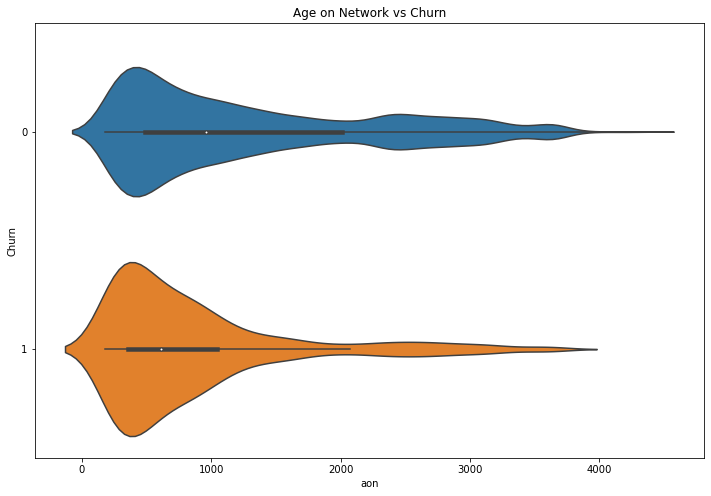

In [61]:
#Age on Network
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

In [62]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [63]:
# function for categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



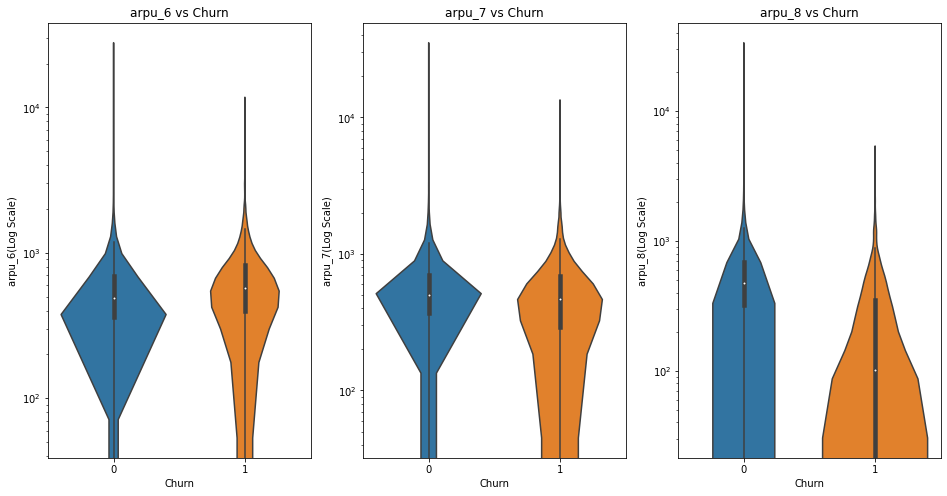

In [64]:
#arpu_6, arpu_7 , arpu_8
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

* We can understand from the above plots that revenue generated by the Customers who are about to churn is very unstable.
* The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2593.000000     2593.000000     2593.000000
mean       867.961342      677.868909      225.083741
std        852.697688      786.961399      471.672718
min          0.000000        0.000000        0.000000
25%        277.880000      110.090000        0.000000
50%        658.360000      466.910000        0.000000
75%       1209.040000      926.760000      255.810000
max       8488.360000     8285.640000     5206.210000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27418.000000    27418.000000    27418.000000
mean       669.554896      712.080684      661.480046
std        636.531612      674.580516      691.079113
min          0.000000        0.000000        0.000000
25%        265.682500      284.500000      227.970000
50%        500.410000      529.935000      470.475000
75%        872.070000      931.197500      866.045000
max    

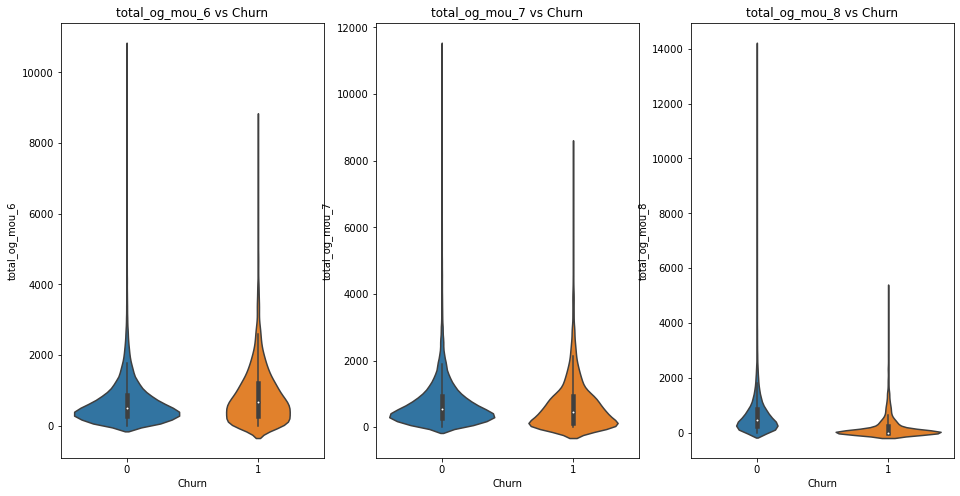

In [65]:
#total_og_mou_6, total_og_mou_7, total_og_mou_8#
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.

Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2593.000000     2593.000000     2593.000000
mean       241.954404      193.341076       68.807042
std        360.836586      318.183813      154.450340
min          0.000000        0.000000        0.000000
25%         49.460000       27.890000        0.000000
50%        137.330000       99.980000        0.000000
75%        289.510000      235.740000       70.290000
max       6633.180000     5137.560000     1859.280000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27418.000000    27418.000000    27418.000000
mean       313.712052      326.369333      316.858595
std        360.580253      372.112086      366.818717
min          0.000000        0.000000        0.000000
25%         94.460000      107.802500       98.265000
50%        212.160000      222.290000      212.360000
75%        401.602500      410.182500      402.270000
max    

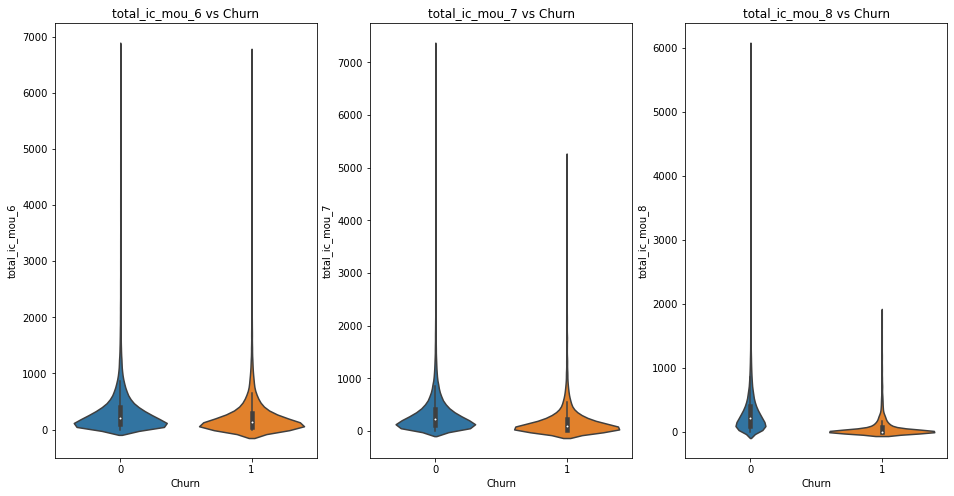

In [66]:
#total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

The Customers with decrease in rate of total_ic_mou in 7th month are more likely to churn, compared to the rest.

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



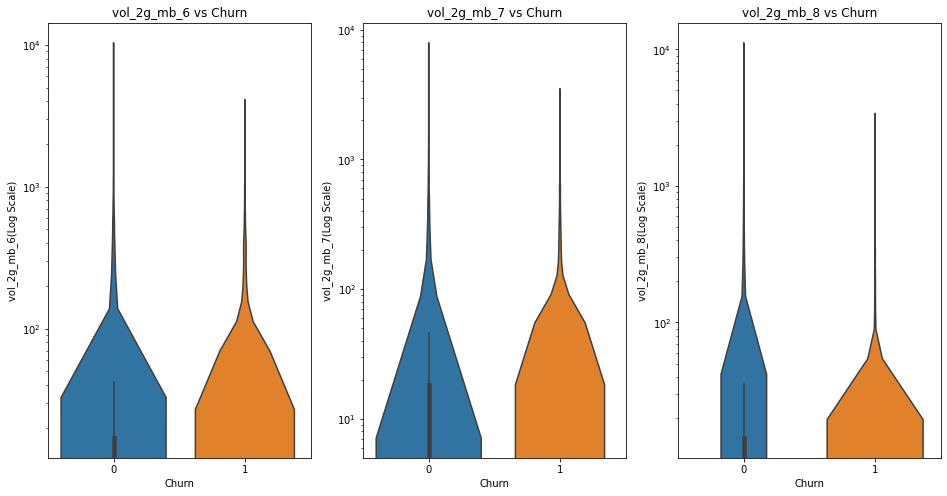

In [67]:
# vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

    Customers with stable usage of 2g volumes throughout 6 and 7 months are less likely to churn.
    Customers with fall in consumption of 2g volumes in 7th month are more likely to Churn.

Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  2593.000000   2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880      0.134593
std     715.327843    690.773561    446.532769      0.495359
min       0.000000      0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  27418.000000  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390      0.177621
std      878.846885    868.808831    885.821105      0.581065
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50% 

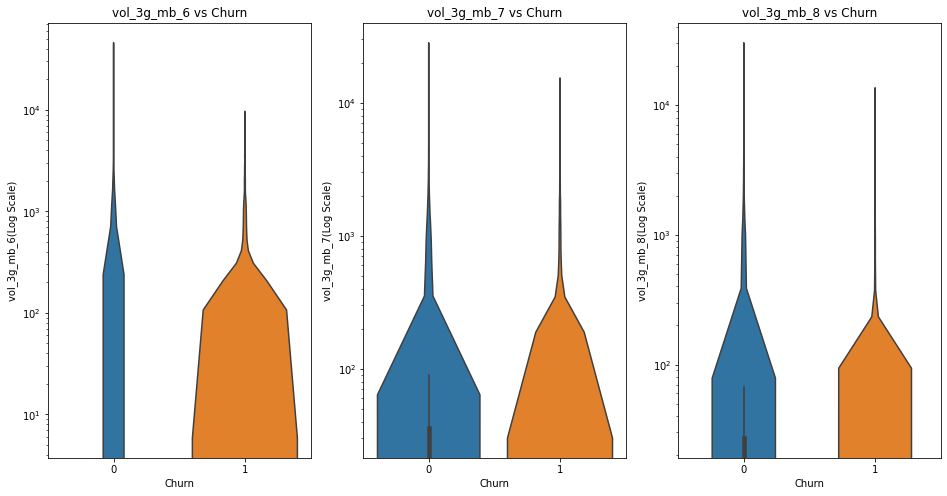

In [68]:
#vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, monthly_3g_6
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

    Customers with stable usage of 3g volumes throughout 6 and 7 months are less likely to churn.
    Customers with fall in consumption of 3g volumes in 7th month are more likely to Churn.

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

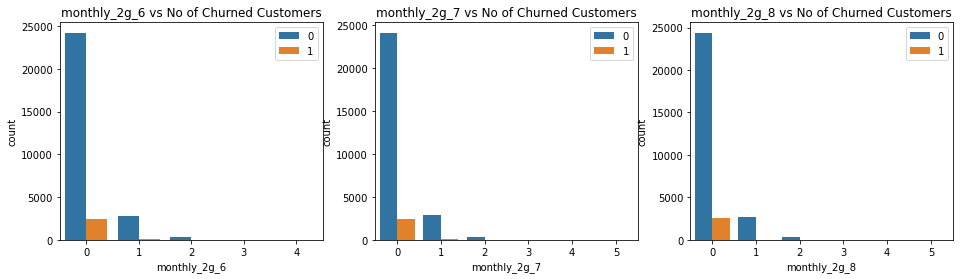

In [69]:
#monthly_2g_6, monthly_2g_7, monthly_2g_8
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

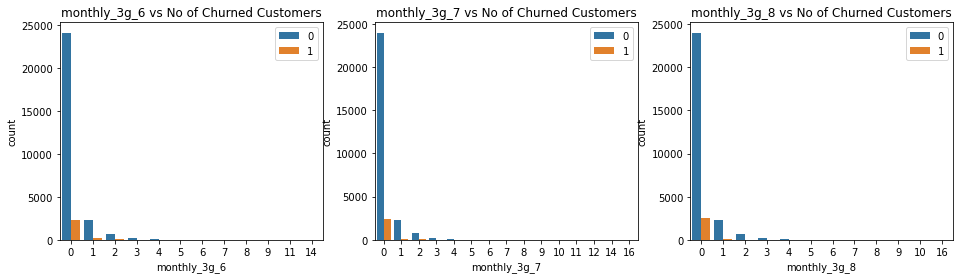

In [70]:
#monthly_3g_6, monthly_3g_7, monthly_3g_8
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

sachet_3g_6    category
sachet_3g_7    category
sachet_3g_8    category
dtype: object
Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |    

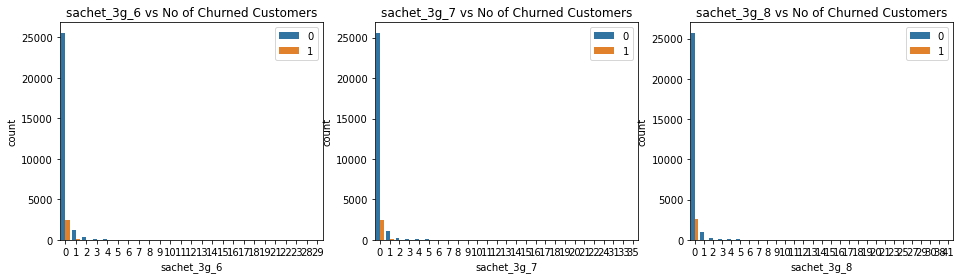

In [71]:
#sachet_3g_6, sachet_3g_7, sachet_3g_8
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(data[columns].dtypes)
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2593.000000  2593.000000  2593.000000
mean     81.564601    71.143880    32.610659
std     320.898511   284.882601   197.998246
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000

Customers who did not churn (Churn : 0)
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27418.000000  27418.000000  27418.000000
mean     125.124167    141.178182    138.597023
std      395.413666    417.292310    402.761779
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      9.940000     17.675000
max    11166.210000   9165.600000  12916.220000 



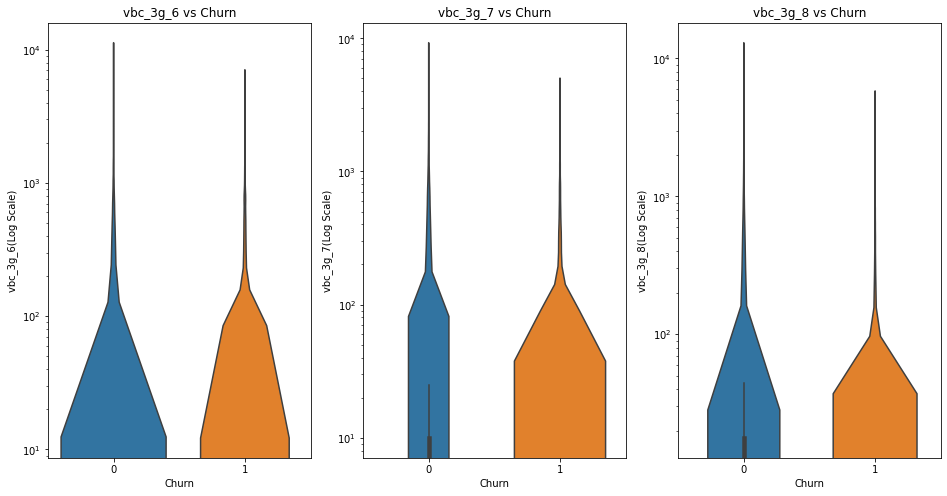

In [72]:
#aug_vbc_3g, jul_vbc_3g, jun_vbc_3g
columns = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns, 'log')

## Bivariate Analysis

In [73]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,0,0,511,0.00,2.45,21.89,459.0,0
7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,0,0,667,0.00,0.00,0.00,408.0,0


<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

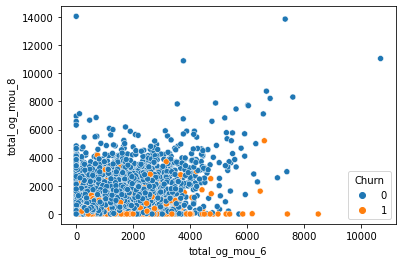

In [74]:
# 'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

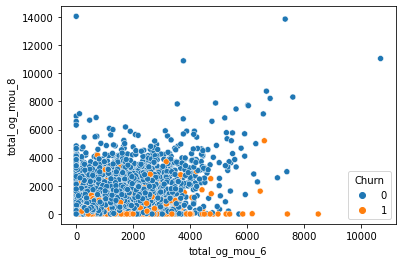

In [75]:
# total_og_mou_7' vs 'total_og_mou_8' with respect to Churn
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])

The customers with lower total_og_mou in 6th and 8th months are more likely to Churn compared to the ones with higher total_og_mou.

<AxesSubplot:xlabel='aon', ylabel='total_og_mou_8'>

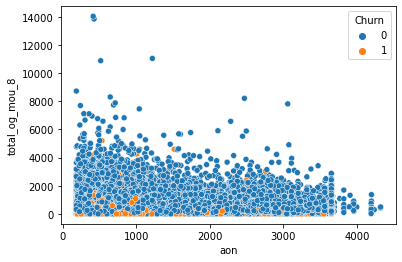

In [76]:
#'aon' vs 'total_og_mou_8' with respect to Churn.
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['Churn'])

The customers with lesser total_og_mou_8 and aon are more likely to churn compared to the one with higher total_og_mou_8 and aon.

<AxesSubplot:xlabel='aon', ylabel='total_ic_mou_8'>

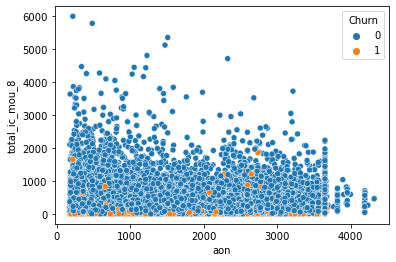

In [77]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['Churn'])

    The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
    The customers with total_ic_mou_8 > 2000 are very less likely to churn.

<AxesSubplot:xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

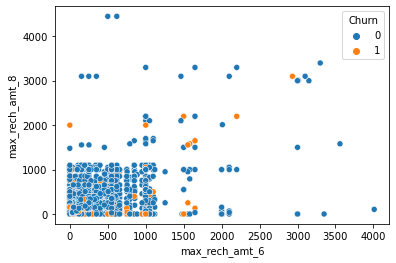

In [78]:
#max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'.
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['Churn'])

# Correlation Analysis¶

In [79]:
# function to correlate variables
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [80]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 
pd.set_option("display.precision", 2)
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_8,isd_og_mou_7,0.960000
isd_og_mou_8,isd_og_mou_6,0.950000
arpu_8,total_rech_amt_8,0.950000
isd_og_mou_7,isd_og_mou_6,0.950000
total_rech_amt_6,arpu_6,0.940000
arpu_7,total_rech_amt_7,0.940000
arpu_7,Average_rech_amt_6n7,0.910000
total_rech_amt_7,Average_rech_amt_6n7,0.910000
loc_ic_mou_6,total_ic_mou_6,0.900000
total_rech_amt_6,Average_rech_amt_6n7,0.900000


In [81]:
# Correlations for Churn : 1  - churned customers
# Absolute values are reported 
pd.set_option('display.precision', 2)
cor_1 = correlation(churned_customers)

# filtering for correlations >= 40%
condition = cor_1['CORR'] > 0.4
cor_1 = cor_1[condition]
cor_1.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
og_others_8,og_others_7,1.000000
arpu_8,total_rech_amt_8,0.960000
total_rech_amt_6,arpu_6,0.950000
onnet_mou_7,std_og_t2t_mou_7,0.950000
arpu_7,total_rech_amt_7,0.950000
std_og_mou_8,total_og_mou_8,0.950000
total_og_mou_7,std_og_mou_7,0.940000
loc_og_t2f_mou_6,og_others_7,0.930000
std_og_t2t_mou_8,onnet_mou_8,0.930000
og_others_8,loc_og_t2f_mou_6,0.930000


# Data Preparation

In [82]:
# Derived variables to measure change in usage 

# Usage 
data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)

# Revenue 
data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)

In [83]:
# Removing variables used for derivation : 
data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

In [84]:
#Outlier
# Looking at quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,18.360000,18.680000,64.480000,41.200000,37.110000,207.930000,207.840000,196.910000,435.160000,437.490000,416.660000,18.380000,18.660000,16.960000,4.040000,4.840000,4.450000,661.740000,657.380000,633.340000,630.530000,663.790000,567.340000,604.410000,645.880000,531.260000,2.200000,2.180000,1.730000,1140.930000,1177.180000,1057.290000,0.000000,0.000000,0.000000,15.930000,19.510000,18.040000,2.260000,0.000000,0.000000,154.880000,156.610000,148.140000,368.540000,364.540000,360.540000,39.230000,41.040000,37.190000,559.280000,558.990000,549.790000,34.730000,36.010000,32.140000,73.380000,75.280000,68.580000,4.360000,4.580000,3.940000,115.910000,118.660000,108.380000,0.280000,0.000000,0.000000,15.010000,18.300000,15.330000,1.160000,1.590000,1.230000,23.000000,23.000000,21.000000,297.000000,300.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2846.000000,1118.000000,29.835000,170.075000,345.070000,147.300000,69.830000,257.309500,319.000000
0.910000,848.967000,878.352000,783.488000,966.740000,984.020000,899.286000,39.692000,23.281000,23.392000,78.431000,50.012000,46.435000,225.963000,224.873000,213.831000,461.095000,461.812000,441.836000,20.281000,20.680000,18.840000,4.680000,5.512000,5.112000,703.112000,692.668000,669.633000,686.255000,722.843000,622.128000,658.472000,695.767000,583.424000,2.910000,2.800000,2.280000,1195.610000,1244.396000,1125.276000,0.000000,0.000000,0.000000,17.540000,21.283000,19.692000,2.540000,0.000000,0.000000,165.792000,168.033000,159.838000,390.636000,387.112000,382.199000,43.590000,45.392000,41.212000,593.133000,589.645000,580.535000,38.212000,39.912000,35.930000,80.412000,81.931000,75.542000,5.210000,5.491000,4.710000,125.981000,129.288000,118.240000,0.300000,0.000000,0.000000,18.341000,21.841000,18.831000,1.440000,1.940000,1.510000,24.000000,24.000000,22.000000,325.000000,330.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2910.100000,1156.000000,39.883000,227.151000,377.460500,161.801000,95.325000,278.900400,345.500000
0.920000,909.054000,941.990000,848.964000,1031.390000,1038.090000,953.354000,48.710000,29.680000,29.644000,93.598000,60.966000,57.594000,247.944000,244.780000,232.330000,490.630000,488.036000,468.830000,22.560000,23.144000,20.930000,5.450000,6.260000,5.864

In [85]:
# Looking at percentage change in quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.790988,6.546981,8.274899,5.587715,5.165172,5.328711,21.271005,26.802832,25.224839,21.636166,21.388350,25.127998,8.672630,8.195246,8.593266,5.959877,5.559441,6.042337,10.342764,10.825295,11.084906,15.841584,13.884298,14.876404,6.252002,5.367976,5.730413,8.837803,8.896338,9.656996,8.944591,7.723881,9.818921,32.272727,28.440367,31.791908,4.792581,5.709917,6.430213,nan,nan,nan,10.106717,9.087647,9.157428,12.389381,nan,nan,7.045455,7.293915,7.896584,5.995550,6.191913,6.007378,11.113943,10.604288,10.814735,6.052961,5.483998,5.592135,10.025914,10.835879,11.792159,9.582993,8.835016,10.151648,19.495413,19.890830,19.543147,8.688638,8.956683,9.097619,7.142857,nan,nan,22.191872,19.349727,22.837573,24.137931,22.012579,22.764228,4.347826,4.347826,4.761905,9.427609,10.000000,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.252284,3.398927,33.678565,33.559312,9.386646,9.844535,36.510096,8.391023,8.307210
0.920000,7.077660,7.245159,8.356988,6.687424,5.494807,6.012325,22.719944,27.485933,26.727086,19.338017,21.902743,24.031442,9.727699,8.852552,8.651225,6.405405,5.678501,6.109507,11.237118,11.914894,11.093418,16.452991,13.570392,14.710485,5.666807,6.211634,6.262684,9.334285,8.790706,9.318983,8.355405,9.372247,9.794249,28.522337,32.500000,32.017544,6.124071,5.680185,6.755143,inf,inf,nan,9.806157,9.918714,10.603291,12.598425,nan,nan,8.679550,8.010926,8.604963,6.464330,6.436897,6.219535,11.603579,11.614381,12.079006,6.154269,5.887441,5.841336,11.828745,11.700742,11.299750,9.767199,10.348952,10.460406,21.497121,20.378802,22.123142,9.794334,9.954520,10.412720,10.000000,nan,inf,23.123058,23.346001,25.197812,23.611111,22.680412,23.178808,4.166667,4.166667,4.545455,7.692308,6.060606,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.443215,3.979239,34.548555,27.360654,11.261178,9.607481,33.756098,8.823437,8.538350
0.930000,8.957224,7.872164,8.480572,6.144814,6.342032,6.712302,24.032026,25.61657

In [86]:
# Columns with outliers 
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [87]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data.loc[condition,col].shape[0] }, ignore_index=True)
    data.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37,301
1,onnet_mou_7,2220.37,301
2,onnet_mou_8,2188.5,301
3,offnet_mou_6,2326.29,301
4,offnet_mou_7,2410.1,301
...,...,...,...
98,delta_total_og_mou,1465.1,301
99,delta_total_ic_mou,619.69,301
100,delta_vbc_3g,929.64,301
101,delta_arpu,864.34,301


In [88]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [89]:
#Grouping Categories with less Contribution
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_2g_6 |
|----+---------------|
|  0 |   82.5631     |
|  1 |    7.87378    |
|  2 |    3.3621     |
|  3 |    2.0126     |
|  4 |    1.32951    |
|  5 |    0.703076   |
|  6 |    0.509813   |
|  7 |    0.356536   |
|  8 |    0.286562   |
|  9 |    0.239912   |
| 10 |    0.17327    |
| 12 |    0.146613   |
| 11 |    0.0999633  |
| 13 |    0.0566459  |
| 14 |    0.0533138  |
| 15 |    0.0433175  |
| 17 |    0.0366532  |
| 19 |    0.029989   |
| 18 |    0.029989   |
| 16 |    0.0233248  |
| 22 |    0.0133284  |
| 20 |    0.00999633 |
| 21 |    0.00999633 |
| 24 |    0.00999633 |
| 25 |    0.00999633 |
| 27 |    0.00333211 |
| 30 |    0.00333211 |
| 32 |    0.00333211 |
| 34 |    0.00333211 |
| 39 |    0.00333211 |
| 28 |    0          |
| 42 |    0          |
+----+---------------+ 

Replaced [5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 17, 19, 18, 16, 22, 20, 21, 24, 25, 27, 30, 32, 34, 39, 28, 42] in sachet_2g_6 with category : Others

 +----+---------

In [90]:
#Creating Dummy Variables
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_3g_6_0,...,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7001524846,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
7002191713,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
7000875565,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7000187447,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [91]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_2g_6_Others',
 'sachet_3g_8_Others',
 'sachet_3g_6_Others',
 'sachet_2g_7_Others',
 'sachet_2g_8_Others',
 'sachet_3g_7_Others']

In [92]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_2g_7_5,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0,1,0,0,0,0,0,1,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,...,0,0,0,0,1,0,0,1,0,0
7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,...,0,1,0,0,0,0,0,1,0,0
7000187447,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,...,0,1,0,0,0,0,0,1,0,0


In [93]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [94]:
data.shape

(30011, 131)

This following section contains

    Test Train Split
    Class Imbalance
    Standardization
    Modelling
        Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
        Model 2 : PCA + Logistic Regression
        

In [95]:
#Train-Test Split
y = data.pop('Churn') # Predicted / Target Variable
X = data # Predictor variables

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [97]:
#Class Imbalance
y.value_counts(normalize=True).to_frame()

,Churn
0,0.91
1,0.09


In [98]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


In [99]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda




To account for class imbalance, Synthetic Minority Class Oversampling Technique (SMOTE) could be used.

In [100]:
#Using SMOTE
#pip install imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_2g_7_5,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,122.68,105.51,149.33,302.23,211.44,264.11,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [101]:
#Standardizing Columns
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [102]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [103]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,...,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,0.10,1074.47,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.39,886.36,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,...,0.00,180.00,-0.91,-28.14,-27.16,-11.65,-14.66,-22.68,-14.96,-14.68
25%,-0.63,-0.60,-0.52,-0.66,-0.65,-0.66,-0.31,-0.32,-0.33,-0.33,...,0.00,424.00,-0.68,0.12,0.11,-0.41,-0.22,0.08,-0.51,-0.48
50%,-0.42,-0.41,-0.40,-0.33,-0.33,-0.36,-0.31,-0.32,-0.33,-0.33,...,0.00,733.00,-0.35,0.15,0.11,0.23,0.13,0.08,0.08,0.03
75%,0.20,0.15,0.01,0.27,0.26,0.23,-0.27,-0.25,-0.22,-0.28,...,0.00,1419.75,0.30,0.15,0.11,0.50,0.36,0.08,0.58,0.58
max,4.09,4.46,5.67,4.02,4.45,5.24,6.11,6.09,6.19,5.41,...,3.00,4321.00,4.46,4.05,4.24,2.96,3.13,4.48,2.84,2.84


# Modelling

# Model 1 : Interpretable Model : Logistic Regression

In [104]:
#Baseline Logistic Regression Model
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [105]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [106]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [107]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [108]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15992  3195]
 [  322  1498]]

Confusion Matrix for test: 
 [[6786 1445]
 [ 305  468]]


In [109]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.823
Specificity / True Negative Rate :  0.833
Precision / Positive Predictive Value : 0.319
F1-score : 0.46


Test Performance : 

Accuracy : 0.806
Sensitivity / True Positive Rate / Recall : 0.605
Specificity / True Negative Rate :  0.824
Precision / Positive Predictive Value : 0.245
F1-score : 0.349


In [110]:
#Baseline Performance - Finding Optimum Probability Cutoff
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [111]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.0,0.0,0.09
0.1,0.97,0.34,0.4
0.2,0.95,0.52,0.56
0.3,0.91,0.66,0.68
0.4,0.87,0.76,0.77
0.5,0.82,0.83,0.83
0.6,0.77,0.88,0.87
0.7,0.67,0.92,0.9
0.8,0.49,0.95,0.91
0.9,0.23,0.98,0.92


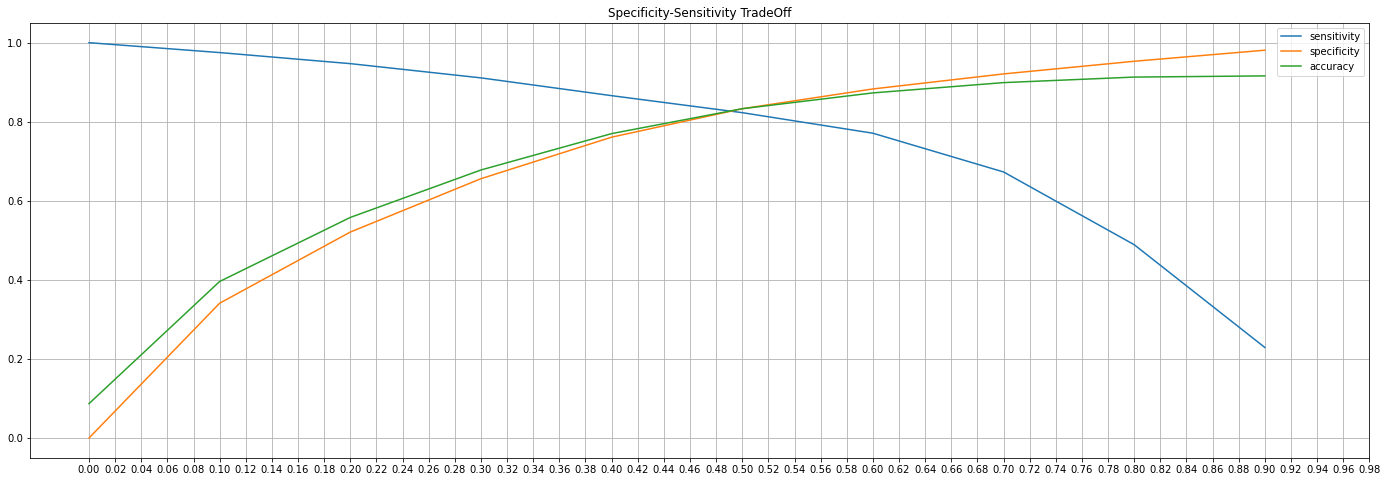

In [112]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [113]:
#Baseline Performance at Optimum Cutoff
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15878  3309]
 [  318  1502]]

Confusion Matrix for test: 
 [[6497 1734]
 [ 249  524]]


In [114]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.78
Sensitivity / True Positive Rate / Recall : 0.678
Specificity / True Negative Rate :  0.789
Precision / Positive Predictive Value : 0.232
F1-score : 0.346


In [115]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.778


# Feature Selection using RFE

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr,n_features_to_select=15)
results = rfe.fit(X_train,y_train)


In [117]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [118]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
83,total_rech_num_8,1,True
110,sachet_3g_8_0,1,True
105,sachet_2g_6_0,1,True
121,sachet_2g_8_0,1,True
34,std_og_t2f_mou_7,1,True
...,...,...,...
109,sachet_2g_6_4,112,False
129,sachet_3g_7_2,113,False
117,sachet_2g_7_2,114,False
46,og_others_7,115,False


In [119]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['total_rech_num_8',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'sachet_2g_8_0',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_7',
 'sachet_3g_6_0',
 'total_rech_num_6',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'monthly_2g_8',
 'loc_og_t2f_mou_7']

# Logistic Regression with RFE Selected Columns

In [120]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4911.0
Date:                Tue, 27 Jun 2023   Deviance:                       9822.0
Time:                        22:48:22   Pearson chi2:                 1.81e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1147
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3628      0.213    -11.113      0.000      -2.779      -1.946
total_rech_num_8    -0.1607      0.006    -26.461      0.000      -0.173      -0.149
sachet_3g_8_0        0.6483      0.202      3.216      0.001       0.253       1.043
sachet_2g_6_0       -0.0687      0.087     -0.793      0.428      -0.239       0.101
sachet_2g_8_0        0.3693      0.098      3.774      0.000       0.178       0.561
std_og_t2f_mou_7     0.0155      0.008      2.062      0.039       0.001       0.030
std_og_t2f_mou_8    -0.0584      0.014     -4.212      0.000      -0.086      -0.031
isd_og_mou_7         0.0164      0.005      3.363      0.001       0.007       0.026
sachet_3g_6_0        0.1034      0.131      0.791      0.429      -0.153       0.360
total_rech_num_6     0.0660      0.003     19.770      0.000       0.059       0.073
loc_ic_t2f_mou_8    -0.0552      0.005    -11.899      0.000      -0.064      -0.046
std_ic_t2t_mou_8    -0.0092      0.002     -5.487      0.000      -0.012      -0.006
std_ic_t2f_mou_7     0.0191      0.005      3.573      0.000       0.009       0.030
std_ic_t2f_mou_8    -0.0600      0.012     -4.947      0.000      -0.084      -0.036
monthly_2g_8        -1.8689      0.205     -9.095      0.000      -2.272      -1.466
loc_og_t2f_mou_7    -0.0163      0.004     -4.296      0.000      -0.024      -0.009
====================================================================================
"""

In [121]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,17.17,1.30e-03
sachet_3g_6_0,16.42,4.29e-01
sachet_2g_6_0,7.95,4.28e-01
sachet_2g_8_0,6.83,2.00e-04
total_rech_num_6,4.33,0.00e+00
total_rech_num_8,3.60,0.00e+00
std_og_t2f_mou_7,2.05,3.92e-02
std_og_t2f_mou_8,2.03,0.00e+00
std_ic_t2f_mou_8,1.88,0.00e+00


In [123]:
selected_columns = rfe_selected_columns

In [124]:
logr2 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4911.0
Date:                Tue, 27 Jun 2023   Deviance:                       9822.0
Time:                        22:50:17   Pearson chi2:                 1.81e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1147
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3628      0.213    -11.113      0.000      -2.779      -1.946
total_rech_num_8    -0.1607      0.006    -26.461      0.000      -0.173      -0.149
sachet_3g_8_0        0.6483      0.202      3.216      0.001       0.253       1.043
sachet_2g_6_0       -0.0687      0.087     -0.793      0.428      -0.239       0.101
sachet_2g_8_0        0.3693      0.098      3.774      0.000       0.178       0.561
std_og_t2f_mou_7     0.0155      0.008      2.062      0.039       0.001       0.030
std_og_t2f_mou_8    -0.0584      0.014     -4.212      0.000      -0.086      -0.031
isd_og_mou_7         0.0164      0.005      3.363      0.001       0.007       0.026
sachet_3g_6_0        0.1034      0.131      0.791      0.429      -0.153       0.360
total_rech_num_6     0.0660      0.003     19.770      0.000       0.059       0.073
loc_ic_t2f_mou_8    -0.0552      0.005    -11.899      0.000      -0.064      -0.046
std_ic_t2t_mou_8    -0.0092      0.002     -5.487      0.000      -0.012      -0.006
std_ic_t2f_mou_7     0.0191      0.005      3.573      0.000       0.009       0.030
std_ic_t2f_mou_8    -0.0600      0.012     -4.947      0.000      -0.084      -0.036
monthly_2g_8        -1.8689      0.205     -9.095      0.000      -2.272      -1.466
loc_og_t2f_mou_7    -0.0163      0.004     -4.296      0.000      -0.024      -0.009
====================================================================================
"""

In [125]:
# vif and p-values
vif(X_train, logr2_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,17.17,1.30e-03
sachet_3g_6_0,16.42,4.29e-01
sachet_2g_6_0,7.95,4.28e-01
sachet_2g_8_0,6.83,2.00e-04
total_rech_num_6,4.33,0.00e+00
total_rech_num_8,3.60,0.00e+00
std_og_t2f_mou_7,2.05,3.92e-02
std_og_t2f_mou_8,2.03,0.00e+00
std_ic_t2f_mou_8,1.88,0.00e+00


In [126]:
logr3 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4911.0
Date:                Tue, 27 Jun 2023   Deviance:                       9822.0
Time:                        22:50:25   Pearson chi2:                 1.81e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1147
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3628      0.213    -11.113      0.000      -2.779      -1.946
total_rech_num_8    -0.1607      0.006    -26.461      0.000      -0.173      -0.149
sachet_3g_8_0        0.6483      0.202      3.216      0.001       0.253       1.043
sachet_2g_6_0       -0.0687      0.087     -0.793      0.428      -0.239       0.101
sachet_2g_8_0        0.3693      0.098      3.774      0.000       0.178       0.561
std_og_t2f_mou_7     0.0155      0.008      2.062      0.039       0.001       0.030
std_og_t2f_mou_8    -0.0584      0.014     -4.212      0.000      -0.086      -0.031
isd_og_mou_7         0.0164      0.005      3.363      0.001       0.007       0.026
sachet_3g_6_0        0.1034      0.131      0.791      0.429      -0.153       0.360
total_rech_num_6     0.0660      0.003     19.770      0.000       0.059       0.073
loc_ic_t2f_mou_8    -0.0552      0.005    -11.899      0.000      -0.064      -0.046
std_ic_t2t_mou_8    -0.0092      0.002     -5.487      0.000      -0.012      -0.006
std_ic_t2f_mou_7     0.0191      0.005      3.573      0.000       0.009       0.030
std_ic_t2f_mou_8    -0.0600      0.012     -4.947      0.000      -0.084      -0.036
monthly_2g_8        -1.8689      0.205     -9.095      0.000      -2.272      -1.466
loc_og_t2f_mou_7    -0.0163      0.004     -4.296      0.000      -0.024      -0.009
====================================================================================
"""

In [127]:
# vif and p-values
vif(X_train, logr3_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,17.17,1.30e-03
sachet_3g_6_0,16.42,4.29e-01
sachet_2g_6_0,7.95,4.28e-01
sachet_2g_8_0,6.83,2.00e-04
total_rech_num_6,4.33,0.00e+00
total_rech_num_8,3.60,0.00e+00
std_og_t2f_mou_7,2.05,3.92e-02
std_og_t2f_mou_8,2.03,0.00e+00
std_ic_t2f_mou_8,1.88,0.00e+00


All features have low p-values(<0.05) and VIF (<5)
This model could be used as the interpretable logistic regression model.

### Final Logistic Regression Model with RFE and Manual Elimination

In [128]:
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4911.0
Date:                Tue, 27 Jun 2023   Deviance:                       9822.0
Time:                        22:50:29   Pearson chi2:                 1.81e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1147
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3628      0.213    -11.113      0.000      -2.779      -1.946
total_rech_num_8    -0.1607      0.006    -26.461      0.000      -0.173      -0.149
sachet_3g_8_0        0.6483      0.202      3.216      0.001       0.253       1.043
sachet_2g_6_0       -0.0687      0.087     -0.793      0.428      -0.239       0.101
sachet_2g_8_0        0.3693      0.098      3.774      0.000       0.178       0.561
std_og_t2f_mou_7     0.0155      0.008      2.062      0.039       0.001       0.030
std_og_t2f_mou_8    -0.0584      0.014     -4.212      0.000      -0.086      -0.031
isd_og_mou_7         0.0164      0.005      3.363      0.001       0.007       0.026
sachet_3g_6_0        0.1034      0.131      0.791      0.429      -0.153       0.360
total_rech_num_6     0.0660      0.003     19.770      0.000       0.059       0.073
loc_ic_t2f_mou_8    -0.0552      0.005    -11.899      0.000      -0.064      -0.046
std_ic_t2t_mou_8    -0.0092      0.002     -5.487      0.000      -0.012      -0.006
std_ic_t2f_mou_7     0.0191      0.005      3.573      0.000       0.009       0.030
std_ic_t2f_mou_8    -0.0600      0.012     -4.947      0.000      -0.084      -0.036
monthly_2g_8        -1.8689      0.205     -9.095      0.000      -2.272      -1.466
loc_og_t2f_mou_7    -0.0163      0.004     -4.296      0.000      -0.024      -0.009
====================================================================================
"""

In [129]:
selected_columns

['total_rech_num_8',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'sachet_2g_8_0',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_7',
 'sachet_3g_6_0',
 'total_rech_num_6',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'monthly_2g_8',
 'loc_og_t2f_mou_7']

In [130]:
# Prediction 
y_train_pred_lr = logr3_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.03
1    0.06
2    0.17
3    0.06
4    0.13
dtype: float64

In [131]:
y_test_pred_lr = logr3_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7002242818    5.25e-04
7000517161    5.41e-01
7002162382    6.39e-02
7002152271    1.42e-01
7002058655    3.25e-02
dtype: float64

### Performance

### Finding Optimum Probability Cutoff

In [132]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0


In [133]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,0.69,0.0,0.35
0.1,0.61,0.52,0.57
0.2,0.45,0.86,0.66
0.3,0.25,0.97,0.61
0.4,0.12,0.99,0.55
0.5,0.06,0.99,0.53
0.6,0.03,1.0,0.51
0.7,0.01,1.0,0.51
0.8,0.0,1.0,0.5
0.9,0.0,1.0,0.5


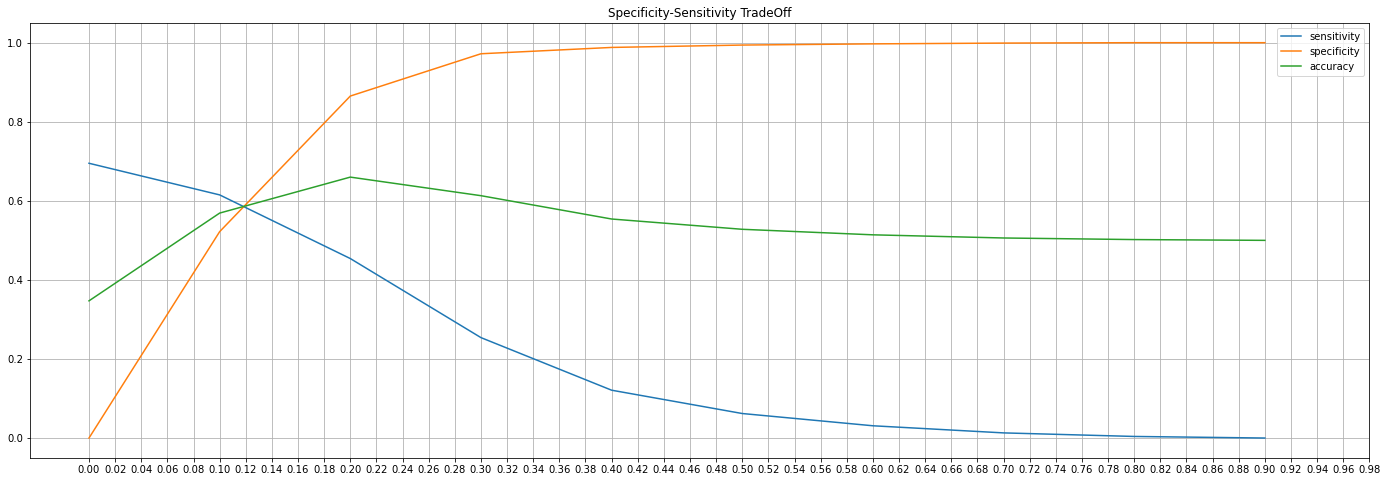

In [134]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [135]:
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[19060   127]
 [17903  1284]]

Confusion Matrix for test: 
 [[8177   54]
 [ 683   90]]


In [136]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.53
Sensitivity / True Positive Rate / Recall : 0.067
Specificity / True Negative Rate :  0.993
Precision / Positive Predictive Value : 0.91
F1-score : 0.125


Test Performance : 

Accuracy : 0.918
Sensitivity / True Positive Rate / Recall : 0.116
Specificity / True Negative Rate :  0.993
Precision / Positive Predictive Value : 0.625
F1-score : 0.196


### Model 1 : Logistic Regression (Interpretable Model Summary)

In [137]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



const              -2.36e+00
monthly_2g_8       -1.87e+00
sachet_3g_8_0       6.48e-01
sachet_2g_8_0       3.69e-01
total_rech_num_8   -1.61e-01
sachet_3g_6_0       1.03e-01
sachet_2g_6_0      -6.87e-02
total_rech_num_6    6.60e-02
std_ic_t2f_mou_8   -6.00e-02
std_og_t2f_mou_8   -5.84e-02
loc_ic_t2f_mou_8   -5.52e-02
std_ic_t2f_mou_7    1.91e-02
isd_og_mou_7        1.64e-02
loc_og_t2f_mou_7   -1.63e-02
std_og_t2f_mou_7    1.55e-02
std_ic_t2t_mou_8   -9.20e-03
Name: coef, dtype: float64

The above model could be used as the interpretable model for predicting telecom churn.

# PCA

In [138]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.64887430e-01,  1.93987506e-01,  1.67239206e-01, ...,
         9.80536379e-06, -6.99789787e-06, -1.91507562e-06],
       [ 6.48591957e-02,  9.55966678e-02,  1.20775173e-01, ...,
         1.70230733e-05, -7.76457960e-06, -2.47272470e-06],
       [ 2.38415388e-01,  2.73645506e-01,  2.38436262e-01, ...,
         1.78192252e-06, -1.07756325e-06,  2.89675361e-07],
       ...,
       [ 7.43406600e-06,  1.44339812e-06, -7.88249744e-06, ...,
         3.74898205e-01,  3.76186850e-01,  3.92232167e-01],
       [ 0.00000000e+00,  6.31185805e-17, -5.36934961e-17, ...,
        -1.07141124e-16, -3.37951224e-16,  1.75823106e-16],
       [-0.00000000e+00, -1.36423439e-16,  1.23728521e-16, ...,
         1.23531214e-16,  1.67390816e-16,  4.05608445e-16]])

In [139]:
pca.explained_variance_ratio_

array([2.72067612e-01, 1.62438240e-01, 1.20827535e-01, 1.06070063e-01,
       9.11349435e-02, 4.77504437e-02, 2.63978655e-02, 2.56843981e-02,
       1.91789383e-02, 1.68045938e-02, 1.55523475e-02, 1.31676635e-02,
       1.04552137e-02, 7.72970450e-03, 7.22746873e-03, 6.14494842e-03,
       5.62073097e-03, 5.44579288e-03, 4.59009989e-03, 4.38488181e-03,
       3.46703628e-03, 3.27941492e-03, 2.78099340e-03, 2.13444272e-03,
       2.07542046e-03, 1.89794721e-03, 1.41383942e-03, 1.30240763e-03,
       1.15369573e-03, 1.05262500e-03, 9.64293423e-04, 9.16685978e-04,
       8.84067043e-04, 7.62966091e-04, 6.61794765e-04, 5.69667259e-04,
       5.12585479e-04, 5.04441285e-04, 4.82396699e-04, 4.46889514e-04,
       4.36441332e-04, 4.10389494e-04, 3.51844819e-04, 3.12626210e-04,
       2.51673025e-04, 2.34723893e-04, 1.96950085e-04, 1.71296756e-04,
       1.59882689e-04, 1.48330399e-04, 1.45919482e-04, 1.08583739e-04,
       1.04038516e-04, 8.90621837e-05, 8.53009236e-05, 7.60704124e-05,
      

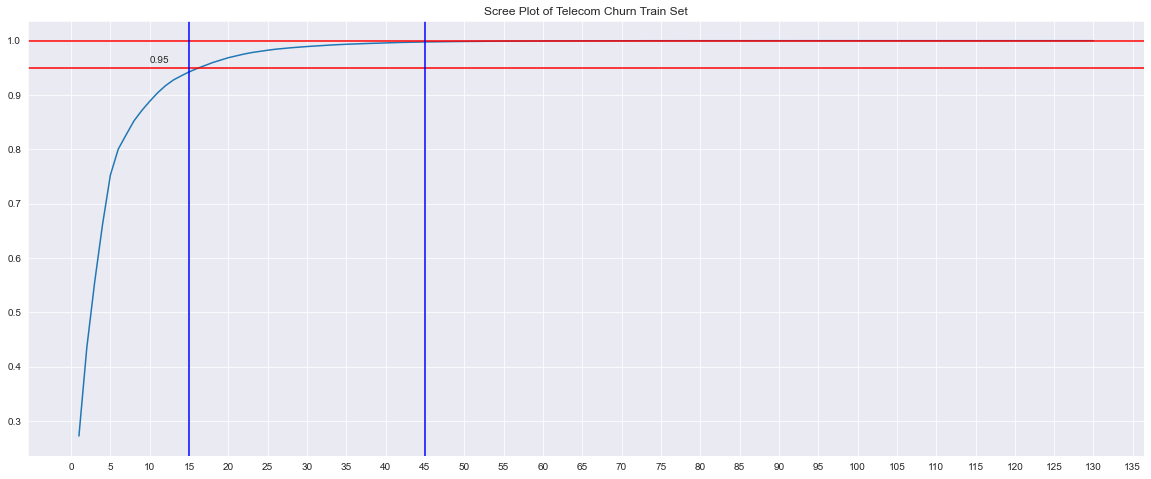

In [140]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.

In [141]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000166926,-907.57,-342.92,13.09,58.81,-95.62,-1050.54,254.65,-31.45,305.14,-216.81,...,22.70,28.71,-14.30,4.96,-8.69,2.46,17.15,-21.83,-8.18,0
7001343085,573.90,-902.39,-424.84,-331.15,-148.99,-36.96,-134.45,265.33,-92.07,-164.20,...,0.20,-66.12,13.57,25.81,52.08,-3.27,8.41,19.39,-38.76,0
7001863283,-1538.20,514.03,846.87,57.03,-1126.23,-84.21,-44.42,-88.16,-58.41,50.52,...,1.65,52.63,-8.56,9.07,-18.35,3.69,25.99,27.24,19.70,0
7002275981,486.83,-224.93,1130.46,-496.19,6.01,81.11,-148.67,170.28,-7.37,-99.56,...,-8.32,-5.93,-5.06,-5.68,-12.09,-14.69,-32.25,12.50,-20.17,0
7001086221,-1420.95,794.07,99.22,155.12,145.35,784.72,-10.95,609.72,-172.48,-42.80,...,-21.92,17.96,-0.85,-19.40,-5.37,6.30,-11.31,41.98,-8.38,0


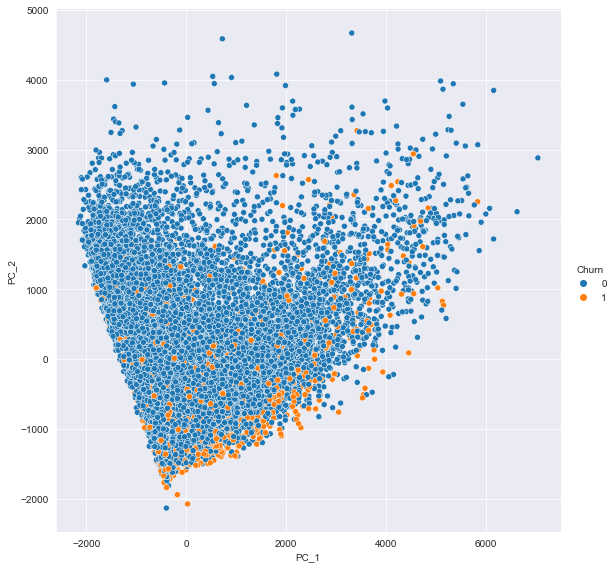

In [142]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);

### Model 2 : PCA + Logistic Regression Model

In [143]:
# X,y Split
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [144]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [145]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [146]:
#Baseline Performance
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.652
Sensitivity / True Positive Rate / Recall : 0.902
Specificity / True Negative Rate :  0.628
Precision / Positive Predictive Value : 0.187
F1-score : 0.31

Test Performance :

Accuracy : 0.269
Sensitivity / True Positive Rate / Recall : 0.953
Specificity / True Negative Rate :  0.205
Precision / Positive Predictive Value : 0.101
F1-score : 0.183


In [147]:
#Hyperparameter Tuning
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [148]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [149]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8753410438144589
Best Parameters : {'C': 4, 'penalty': 'l2'}


In [150]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [151]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [152]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.626
Sensitivity / True Positive Rate / Recall : 0.918
Specificity / True Negative Rate :  0.598
Precision / Positive Predictive Value : 0.178
F1-score : 0.298

Test Performance :

Accuracy : 0.152
Sensitivity / True Positive Rate / Recall : 0.984
Specificity / True Negative Rate :  0.074
Precision / Positive Predictive Value : 0.091
F1-score : 0.167


# Recommendations

In [ ]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

From the above, the following are the strongest indicators of churn

* Customers who churn show lower average monthly local incoming calls from fixed line in the action period by 1.27 standard deviations , compared to users who don't churn , when all other factors are held constant. This is the strongest indicator of churn.
* Customers who churn show lower number of recharges done in action period by 1.20 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn.
* Further customers who churn have done 0.6 standard deviations higher recharge than non-churn customers. This factor when coupled with above factors is a good indicator of churn.
* Customers who churn are more likely to be users of 'monthly 2g package-0 / monthly 3g package-0' in action period (approximately 0.3 std deviations higher than other packages), when all other factors are held constant.

Based on the above indicators the recommendations to the telecom company are :

* Concentrate on users with 1.27 std devations lower than average incoming calls from fixed line. They are most likely to churn.
* Concentrate on users who recharge less number of times ( less than 1.2 std deviations compared to avg) in the 8th month. They are second most likely to churn.
* Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.87, test sensitivity of 100%